In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [151]:
max_income = 100000
min_income = 15000
nit_withdrawal_rate = 0.6
intersection = min_income / nit_withdrawal_rate

In [47]:
def adjust(x):
    if x <= intersection: 
        tax = nit_withdrawal_rate * x
        return x - tax + min_income, tax - min_income
    else:
        tax = 0
        if x <= 60000:
            tax += (x - intersection) * 0.4
        else:
            tax = (60000 - intersection) * 0.4
            tax += (x - 60000) * 0.5
        return x - tax, tax

In [140]:
incomes = np.arange(start=0, stop=max_income)
adj_incomes = [adjust(i)[0] for i in incomes]
tax = [adjust(i)[1] for i in incomes]

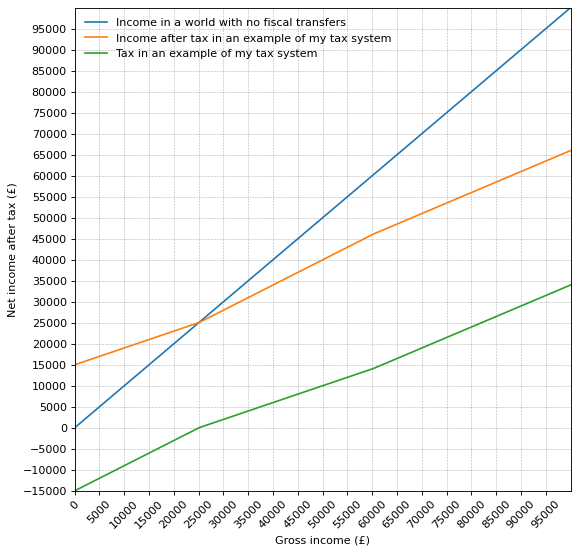

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi= 80)    
plt.plot(incomes, incomes, label="Income in a world with no fiscal transfers")
plt.plot(incomes, adj_incomes, label="Income after tax in an example of my tax system")
plt.plot(incomes, tax, label="Tax in an example of my tax system")
plt.legend(framealpha=0)
plt.xticks(range(0, max_income, 5000), rotation=45)
plt.yticks(range(-20000, max_income, 5000))
plt.margins(x=0, y=0)
plt.hlines(
    range(-min_income, max_income, 5000), 
    xmin=0, 
    xmax=max_income, 
    colors='black', 
    alpha=0.3, 
    linestyles="--", 
    lw=0.5
)
plt.vlines(
    range(0, max_income, 5000), 
    ymin=-min_income, 
    ymax=max_income, 
    colors='black', 
    alpha=0.3, 
    linestyles="--", 
    lw=0.5
)
plt.xlabel("Gross income (£)")
plt.ylabel("Net income after tax (£)")
plt.savefig('negative-income-tax.svg', transparent=True)
plt.show()